### Load Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
!pip install opencv-python

### Prepare/collect data

In [2]:
import os
import cv2
import numpy as np
from random import sample

# Define the path to your dataset
data_dir = 'brain_tumor/Training/'

# Define the classes and their corresponding labels
classes = {'no_disease': 0, 'pituitary_tumor': 1, 'moderate_alzheimer': 2}

# Initialize lists to store images and labels
X = []
Y = []

# Initialize dictionary to store images for each class
class_images = {0: [], 1: [], 2: []}

# Loop through each class
for cls in classes:
    # Define the path to images for the current class
    cls_path = os.path.join(data_dir, cls)
    
    # Loop through each image in the current class
    for img_file in os.listdir(cls_path):
        # Read the image and resize it
        img = cv2.imread(os.path.join(cls_path, img_file), 0)
        img = cv2.resize(img, (200, 200))
        
        # Append the image and its corresponding label to the lists
        X.append(img)
        Y.append(classes[cls])
        
        # Append the image to the corresponding class list
        class_images[classes[cls]].append(img)

# Convert lists to numpy arrays
X = np.array(X)
Y = np.array(Y)

# Reshape the image data
X = X.reshape(len(X), -1)

# Calculate the number of images in class 2
num_images_class2 = len(class_images[2])

# Randomly select a subset of images from classes 0 and 1
selected_images_class0 = sample(class_images[0], num_images_class2)
selected_images_class1 = sample(class_images[1], num_images_class2)

# Combine selected images from classes 0, 1, and all images from class 2
X_balanced = np.array(selected_images_class0 + selected_images_class1 + class_images[2])
Y_balanced = np.array([0] * num_images_class2 + [1] * num_images_class2 + [2] * num_images_class2)

# Check the shape of balanced data
print("Shape of balanced data:", X_balanced.shape, Y_balanced.shape)


Shape of balanced data: (1485, 200, 200) (1485,)


In [3]:
import pandas as pd
pd.Series(Y_balanced).value_counts()

0    495
1    495
2    495
dtype: int64

In [4]:
X=X_balanced
Y=Y_balanced

In [5]:
X.shape

(1485, 200, 200)

### Visualize data

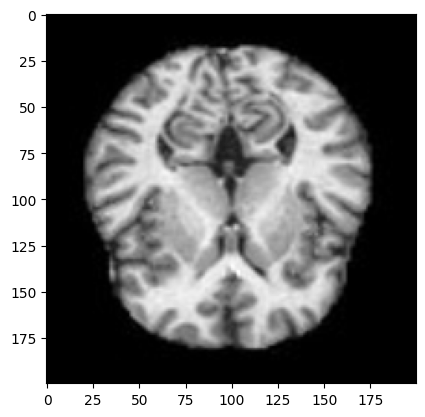

In [6]:
plt.imshow(X[0], cmap='gray')

### Prepare data

In [7]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1485, 40000)

### Split Data

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [9]:
xtrain.shape, xtest.shape

((1188, 40000), (297, 40000))

In [10]:
print(len(xtrain))
print(len(xtest))

1188
297


In [11]:
pd.Series(ytrain).value_counts()

1    407
0    399
2    382
dtype: int64

In [12]:
pd.Series(ytest).value_counts()

2    113
0     96
1     88
dtype: int64

### Feature Scaling

In [13]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255


print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())


255 0
255 0
1.0 0.0
1.0 0.0


In [14]:
len(xtrain)

1188

### Train Model

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [16]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression()
lg.fit(xtrain, ytrain)

LogisticRegression()

In [17]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

In [18]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier(n_estimators=150,random_state=0)
rf.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=150, random_state=0)

### Evaluation

In [20]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.9797979797979798


In [21]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9806397306397306
Testing Score: 0.9730639730639731


In [22]:
print("Training Score:", dt.score(xtrain, ytrain))
print("Testing Score:", dt.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.9663299663299664


In [23]:
print("Training Score:", rf.score(xtrain, ytrain))
print("Testing Score:", rf.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.98989898989899


### Prediction

In [24]:
pred = lg.predict(xtest)
confusion_matrix(ytest, pred)

array([[ 92,   4,   0],
       [  2,  86,   0],
       [  0,   0, 113]])

In [25]:
pred = sv.predict(xtest)
confusion_matrix(ytest, pred)

array([[ 88,   8,   0],
       [  0,  88,   0],
       [  0,   0, 113]])

In [26]:
pred = dt.predict(xtest)
confusion_matrix(ytest, pred)

array([[ 90,   6,   0],
       [  3,  85,   0],
       [  1,   0, 112]])

In [27]:
pred = rf.predict(xtest)
confusion_matrix(ytest, pred)

array([[ 94,   2,   0],
       [  1,  87,   0],
       [  0,   0, 113]])

In [28]:
misclassified=np.where(ytest!=pred)
misclassified

(array([ 85, 179, 274]),)

In [29]:
print("Total Misclassified Samples: ",len(misclassified[0]))
#print(pred[36],ytest[36])

Total Misclassified Samples:  3


### TEST MODEL

In [30]:
dec = {0:'No Disease', 1:'Positive Tumor', 2:'Positive Alzheimer'}

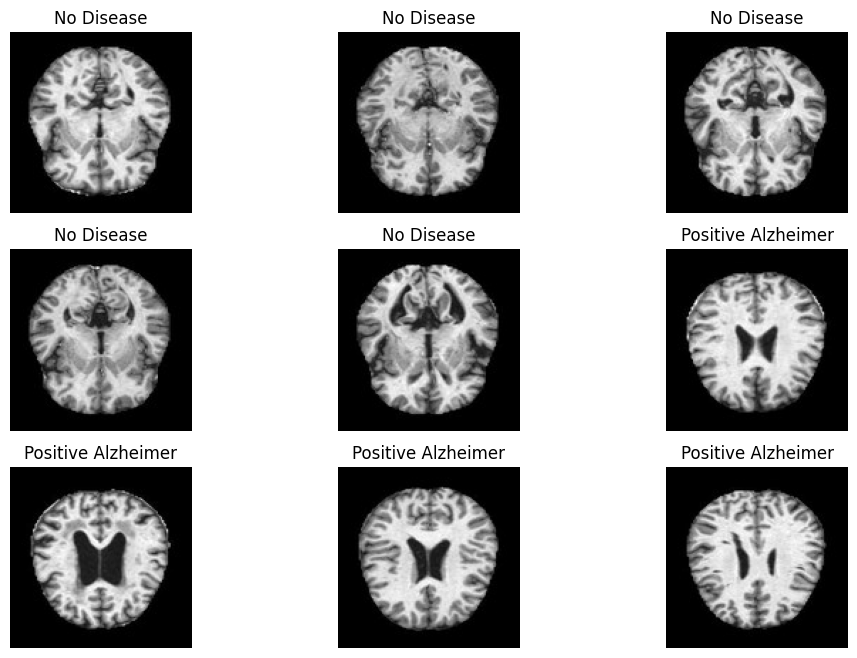

In [31]:
plt.figure(figsize=(12,8))
p = os.listdir('brain_tumor/Testing/')
c=1
for i in os.listdir('brain_tumor/Testing/no_disease/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('brain_tumor/Testing/no_disease/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1
   


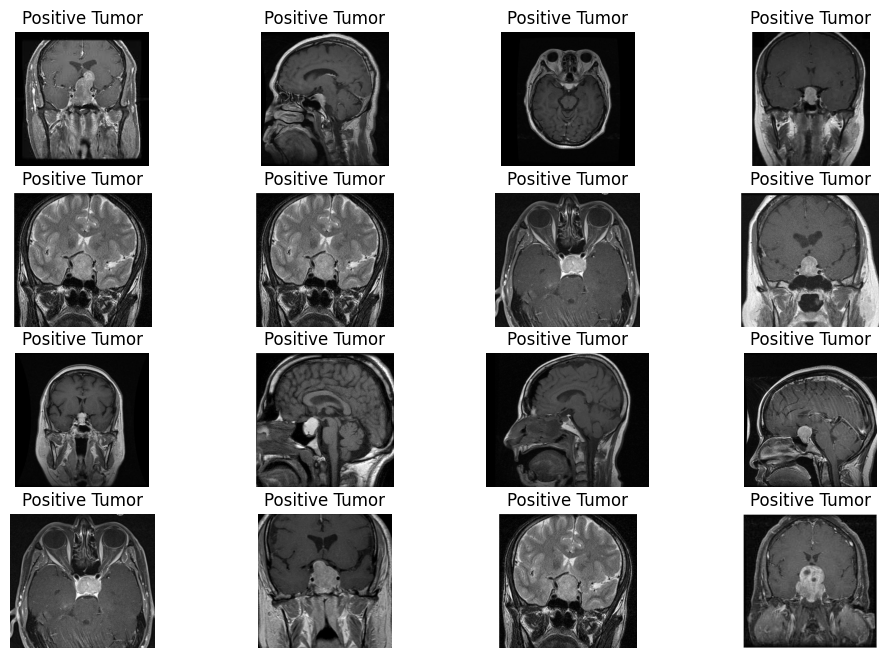

In [32]:
plt.figure(figsize=(12,8))
p = os.listdir('brain_tumor/Testing/')
c=1
for i in os.listdir('brain_tumor/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('brain_tumor/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

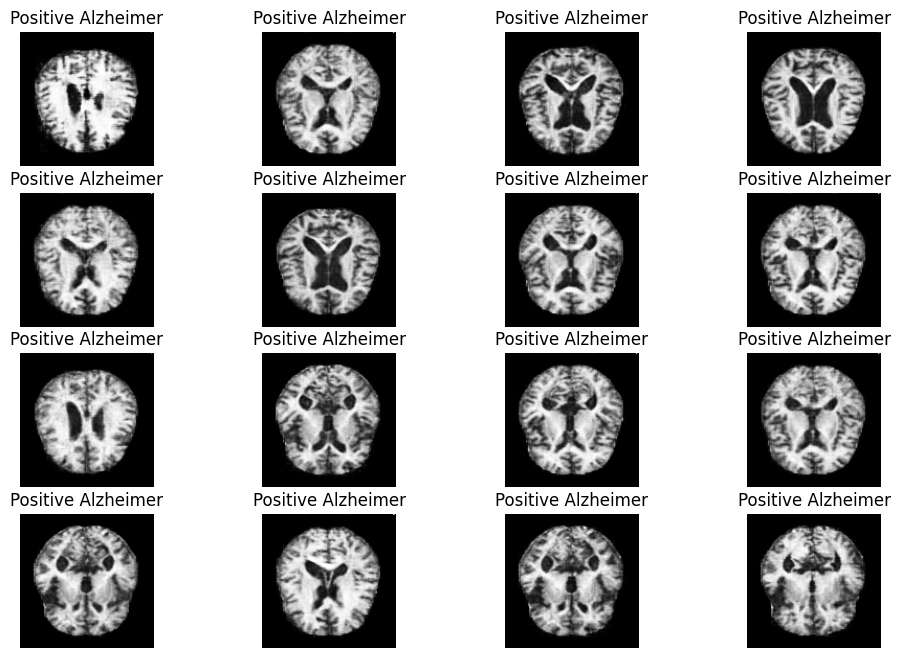

In [33]:
plt.figure(figsize=(12,8))
p = os.listdir('brain_tumor/Testing/')
c=1
for i in os.listdir('brain_tumor/Testing/moderate_test/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('brain_tumor/Testing/moderate_test/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1